In [67]:
import numpy as np
import pandas as pd
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addvars, addvals

#データ読み込み
df_tc = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/trans_cost.csv", index_col="工場")
df_demand = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/demand.csv")
df_supply = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/supply.csv")

#初期設定
np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

#数理モデル作成
m1 = model_min()
v1 = {(i, j):LpVariable("v%d_%d"%(i, j), lowBound=0) for i,j in pr}
m1 += lpSum(df_tc.iloc[i][j]*v1[i, j] for i,j in pr)

for i in range(nw):
    m1 += lpSum(v1[i, j] for j in range(nf)) <= df_supply.iloc[0][i]
for j in range(nf):
    m1 += lpSum(v1[i, j] for i in range(nw)) >= df_demand.iloc[0][j]
m1.solve()

#総輸送コスト計算
df_tr_sol = df_tc.copy()
total_cost = 0

for k ,x in v1.items():
    i,j = k[0],k[1]
    print("i:" + str(int(i)) + " j:" + str(int(j)))
    df_tr_sol.iloc[i][j] = value(x)
    total_cost += df_tc.iloc[i][j]*value(x)

print(df_tr_sol)
print("総輸送コスト:"+str(total_cost))

i:0 j:0
i:0 j:1
i:0 j:2
i:0 j:3
i:1 j:0
i:1 j:1
i:1 j:2
i:1 j:3
i:2 j:0
i:2 j:1
i:2 j:2
i:2 j:3
    F1  F2  F3  F4
工場                
W1  28   7   0   0
W2   0   0  31   5
W3   0  22   0  20
総輸送コスト:1296.0


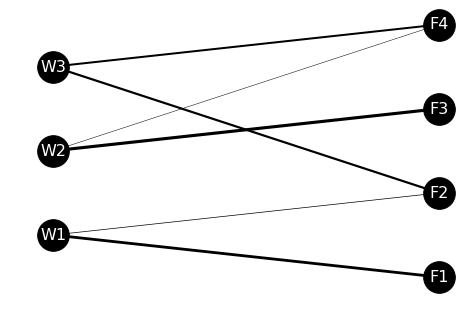

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#データ読み込み
df_pos = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/trans_route_pos.csv")

#グラフオブジェクトの作成
G = nx.Graph()

#エッジの重みのリスト化
size = 0.1
edge_weights = []
for i in range(len(df_tr_sol.columns)):
    for j in range(len(df_tr_sol.index)):
        edge_weights.append(df_tr_sol.iloc[j][i]*size)

#グラフオブジェクトの作成
G = nx.Graph()

#頂点の設定
for i in range(len(df_tr_sol.columns)):
    G.add_node(df_tr_sol.columns[i])

for i in range(len(df_tr_sol.index)):
    G.add_node(df_tr_sol.index[i])

    
#辺の設定
for i in range(len(df_tr_sol.columns)):
    for j in range(len(df_tr_sol.index)):
        G.add_edge(df_tr_sol.columns[i], df_tr_sol.index[j])

#座標の設定
pos={}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])

#描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="k", font_color="w", width=edge_weights)

#表示
plt.show()


In [91]:
import pandas as pd
import numpy as np


#読み込み対象データ：df_tr_sol
df_demand = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/demand.csv")
df_supply = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/supply.csv")

#制約条件の計算関数
#需要側
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

#供給側
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum <= df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

print("需要条件計算結果："+str(condition_demand(df_tr_sol, df_demand)))
print("供給条件計算結果："+str(condition_supply(df_tr_sol, df_supply)))


需要条件計算結果：[1. 1. 1. 1.]
供給条件計算結果：[1. 1. 1.]


temp_sum = sum(df_tr.loc[df_supply.columns[i]])

df_tr_solは4列、df_supplyは3列。
df_supplyの3"列"(W1~3)を、df_tr_solの3"行"に合わせ込むには、  
(というよりは列で行を参照させるには、)locを使用する。
文字列で検索する場合はlocを、セル番号で検索する場合はilocを使う。

In [103]:
import pandas as pd

df_material = pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/product_plan_material.csv", index_col="製品")
df_profit =  pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/product_plan_profit.csv", index_col="製品")
df_stock =  pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/product_plan_stock.csv", index_col="項目")
df_plan =  pd.read_csv("./sample_100knocks/サンプルコード_20200325/7章/product_plan.csv", index_col="製品")

print(df_material)
print(df_profit)
print(df_stock)
print(df_plan)

     原料1  原料2  原料3
製品                
製品1    1    4    3
製品2    2    4    1
      利益
製品      
製品1  5.0
製品2  4.0
    原料1  原料2  原料3
項目               
在庫   40   80   50
      生産量
製品       
製品1    16
製品2     0


In [99]:
#knock65 利益を計算する関数
def product_plan(df_profit, df_plan):
    profit = 0
    for i in range(len(df_profit.index)):
        profit += df_profit.iloc[i][0] * df_plan.loc[df_profit.index].iloc[i][0]
    return profit
print("総利益："+str(product_plan(df_profit, df_plan)))

総利益：80.0


In [114]:
#knock66 利益最適化問題
import numpy as np
import pandas as pd
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_max, addvars, addvals


df_copy = df_material.copy()
inv = df_stock

#数理モデル作成
m = model_max()
v1 = {(i):LpVariable("v%d"%(i), lowBound=0) for i in range(len(df_profit))}
m += lpSum(df_profit.iloc[i]*v1[i] for i in range(len(df_profit)))
print(v1)
print(m)

for i in range(len(df_material.columns)):
    m += lpSum(df_material.iloc[j, i]*v1[j] for j in range(len(df_profit))) <= df_stock.iloc[:,i]
m.solve()

print(m)

df_plan_sol = df_plan.copy()
for k, x in v1.items():
    df_plan_sol.iloc[k] = value(x)
print(df_plan_sol)
print("総利益:"+str(value(m.objective)))

{0: v0, 1: v1}
NoName:
MAXIMIZE
5.0*v0 + 4.0*v1 + 0.0
VARIABLES
v0 Continuous
v1 Continuous

NoName:
MAXIMIZE
5.0*v0 + 4.0*v1 + 0.0
SUBJECT TO
_C1: v0 + 2 v1 <= 40

_C2: 4 v0 + 4 v1 <= 80

_C3: 3 v0 + v1 <= 50

VARIABLES
v0 Continuous
v1 Continuous

      生産量
製品       
製品1  15.0
製品2   5.0
総利益:95.0


In [125]:
#knock 67制約条件の計算関数
def condition_stock(df_plan,df_material, df_stock):
    flag = np.zeros(len(df_material.columns))
    for i in range(len(df_material.columns)):
        temp_sum = 0
        for j in range(len(df_material.index)):
            temp_sum += float(df_plan.iloc[j]) * df_material.iloc[j][i]
        if temp_sum <= float(df_stock.iloc[0][i]):
            flag[i] = 1
        print(df_material.columns[i]+"使用量:"+str(temp_sum)+", 在庫:"+str(df_stock.iloc[0][i]))
    return flag

print("制約条件計算結果:"+str(condition_stock(df_plan_sol, df_material, df_stock)))


原料1使用量:25.0, 在庫:40
原料2使用量:80.0, 在庫:80
原料3使用量:50.0, 在庫:50
制約条件計算結果:[1. 1. 1.]


In [139]:
#knock68
import numpy as np
import pandas as pd

製品 = list("AB")
需要地 = list("PQ")
工場 = list("XY")
レーン = (2, 2)

#輸送費表
tbdi = pd.DataFrame(((j, k) for j in 需要地 for k in 工場), columns=["需要地", "工場"])
tbdi["輸送費"] = [1, 2, 3, 1]
print(tbdi)

#需要表
tbde = pd.DataFrame(((j, i) for j in 需要地 for i in 製品), columns=["需要地", "製品"])
tbde["需要"] = [10, 10, 20, 20]
print(tbde)

#生産表
tbfa = pd.DataFrame(((k, l, i, 0, np.inf) for k,nl in zip (工場, レーン) for l in range(nl) for i in 製品), columns=["工場", "レーン", "製品", "下限", "上限"])
tbfa["生産費"] = [1, np.nan, np.nan, 1, 3, np.nan, 5, 3]
tbfa.dropna(inplace=True)
tbfa.loc[4, "上限"] = 10
print(tbfa)

from ortoolpy import logistics_network
_, tbdi2, _ = logistics_network(tbde, tbdi, tbfa)
print(tbfa)
print(tbdi2)

  需要地 工場  輸送費
0   P  X    1
1   P  Y    2
2   Q  X    3
3   Q  Y    1
  需要地 製品  需要
0   P  A  10
1   P  B  10
2   Q  A  20
3   Q  B  20
  工場  レーン 製品  下限    上限  生産費
0  X    0  A   0   inf  1.0
3  X    1  B   0   inf  1.0
4  Y    0  A   0  10.0  3.0
6  Y    1  A   0   inf  5.0
7  Y    1  B   0   inf  3.0
  工場  レーン 製品  下限    上限  生産費     VarY  ValY
0  X    0  A   0   inf  1.0  v000061  20.0
3  X    1  B   0   inf  1.0  v000062  10.0
4  Y    0  A   0  10.0  3.0  v000063  10.0
6  Y    1  A   0   inf  5.0  v000064   0.0
7  Y    1  B   0   inf  3.0  v000065  20.0
  需要地 工場  輸送費 製品     VarX  ValX
0   P  X    1  A  v000053  10.0
1   P  X    1  B  v000054  10.0
2   Q  X    3  A  v000055  10.0
3   Q  X    3  B  v000056   0.0
4   P  Y    2  A  v000057   0.0
5   P  Y    2  B  v000058   0.0
6   Q  Y    1  A  v000059  10.0
7   Q  Y    1  B  v000060  20.0


In [145]:
#knock69
trans_cost = 0
for i in range(len(tbdi2.index)):
    trans_cost += tbdi2["輸送費"].iloc[i] * tbdi2["ValX"].iloc[i]
print("輸送費:"+str(trans_cost))

輸送費:80.0


In [147]:
#knock70
product_cost = 0
for i in range(len(tbfa.index)):
    product_cost += tbfa["生産費"].iloc[i] * tbfa["ValY"].iloc[i]
print("生産費:"+str(product_cost))

生産費:120.0
